In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

import matplotlib.pyplot as plt

model = load_model("model.keras")

import warnings

warnings.simplefilter(action="ignore", category=FutureWarning)

import requests
from PIL import Image
from io import BytesIO

In [53]:
def plotImages(original_image, images_arr):
    plt.figure(figsize=(10, 5))

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    # Plot preprocessed image
    plt.subplot(1, 2, 2)
    plt.imshow(images_arr[0])
    plt.title("Preprocessed Image")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

In [54]:
def getPrediction(image_path, image_url=False):
    try:
        if image_url:
            response = requests.get(image_path)
            o_img = Image.open(BytesIO(response.content))
        else:
            o_img = tf.keras.preprocessing.image.load_img(
                image_path, target_size=(224, 224)
            )

        img = o_img.resize((224, 224))
        img_array = tf.keras.preprocessing.image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = tf.keras.applications.vgg16.preprocess_input(img_array)

        plotImages(o_img, img_array)

        predictions = model.predict(x=img_array, verbose=0)

        if np.argmax(predictions, axis=-1) == 0:
            print("Prediction: Cat")
        else:
            print("Prediction: Dog")
    except:
        print("Invalid Image Path")

# Classify Images of Cats and Dogs - (Task - 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


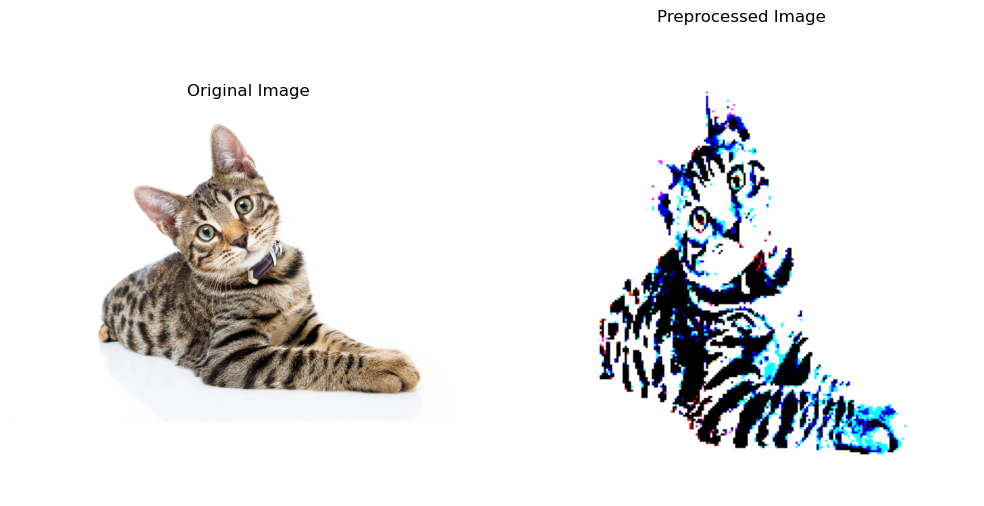

Prediction: Cat


In [55]:
getPrediction(
    "https://th-thumbnailer.cdn-si-edu.com/ii_ZQzqzZgBKT6z9DVNhfPhZe5g=/fit-in/1600x0/filters:focal(1061x707:1062x708)/https://tf-cmsv2-smithsonianmag-media.s3.amazonaws.com/filer_public/55/95/55958815-3a8a-4032-ac7a-ff8c8ec8898a/gettyimages-1067956982.jpg",
    image_url=True,
)